### 판다스
- 확인학습
- 타입전환
- 중복처리
- 종합실습

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# font_path = r'C:\Temp\2025\python2\35. 0905\NanumGothic.ttf'
# font_manager.fontManager.addfont(font_path)
# font_prop = font_manager.FontProperties(fname=font_path, size=12)
# rc('font', family=font_prop.get_name())

plt.rc('font', family='NanumGothic')

data = {
    '학번': [2001, 2002, 2003, 2004, 2005],
    '이름': ['홍길동', '김철수', '이영희', '박민수', '최지우'],
    '성별': ['M', 'F', 'F', 'M', 'F'],
    '국어': [85, 90, np.nan, 78, 88],
    '영어': [82, 95, 85, np.nan, 92],
    '수학': [88, 93, 80, 75, 85],
}
df = pd.DataFrame(data)
df

,학번,이름,성별,국어,영어,수학
0,2001,홍길동,M,85.0,82.0,88
1,2002,김철수,F,90.0,95.0,93
2,2003,이영희,F,NaN,85.0,80
3,2004,박민수,M,78.0,NaN,75
4,2005,최지우,F,88.0,92.0,85


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      5 non-null      int64  
 1   이름      5 non-null      object 
 2   성별      5 non-null      object 
 3   국어      4 non-null      float64
 4   영어      4 non-null      float64
 5   수학      5 non-null      int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 368.0+ bytes


In [390]:
df.shape

(5, 6)

In [391]:
df.isna().sum()

학번    0
이름    0
성별    0
국어    1
영어    1
수학    0
dtype: int64

In [392]:
# 어떤 컬럼에서든 결측값이 하나라도 있는 행만 보기
df[df.isna().any(axis=1)]

,학번,이름,성별,국어,영어,수학
2,2003,이영희,F,NaN,85.0,80
3,2004,박민수,M,78.0,NaN,75


In [393]:
df.describe()

,학번,국어,영어,수학
count,5.000000,4.000000,4.000000,5.000000
mean,2003.000000,85.250000,88.500000,84.200000
std,1.581139,5.251984,6.027714,6.978539
min,2001.000000,78.000000,82.000000,75.000000
25%,2002.000000,83.250000,84.250000,80.000000
50%,2003.000000,86.500000,88.500000,85.000000
75%,2004.000000,88.500000,92.750000,88.000000
max,2005.000000,90.000000,95.000000,93.000000


In [394]:
df2 = df.dropna()
df2

,학번,이름,성별,국어,영어,수학
0,2001,홍길동,M,85.0,82.0,88
1,2002,김철수,F,90.0,95.0,93
4,2005,최지우,F,88.0,92.0,85


In [395]:
df['국어'].mean()

np.float64(85.25)

In [396]:
df['국어'].fillna(df['국어'].mean())

0    85.00
1    90.00
2    85.25
3    78.00
4    88.00
Name: 국어, dtype: float64

In [397]:
df['국어'] = df['국어'].fillna(df['국어'].mean())
df[['국어']]

,국어
0,85.00
1,90.00
2,85.25
3,78.00
4,88.00


In [398]:
df.loc[2, '수학'] = 150
df

,학번,이름,성별,국어,영어,수학
0,2001,홍길동,M,85.00,82.0,88
1,2002,김철수,F,90.00,95.0,93
2,2003,이영희,F,85.25,85.0,150
3,2004,박민수,M,78.00,NaN,75
4,2005,최지우,F,88.00,92.0,85


In [399]:
# 이상치 처리 공식 활용(IQR : Interquartitle Range, 사분위 범위)
q1 = df['수학'].quantile(0.25)
q3 = df['수학'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['수학'] = np.where((df['수학'] < lower_bound) | (df['수학'] > upper_bound), df['수학'].mean(), df['수학'])
df

,학번,이름,성별,국어,영어,수학
0,2001,홍길동,M,85.00,82.0,88.0
1,2002,김철수,F,90.00,95.0,93.0
2,2003,이영희,F,85.25,85.0,98.2
3,2004,박민수,M,78.00,NaN,75.0
4,2005,최지우,F,88.00,92.0,85.0


In [400]:
# 이상치 처리 다른 방식 (z-score)
# (원점수 - 평균) / 표준편차
# 표본이 작거나 정규분포를 따르지 않으면 부정확
zscore = (df['수학'] - df['수학'].mean()) / df['수학'].std()
print(zscore,'\nstd :',df['수학'].std())
df['수학'] = np.where((zscore < -3) | (zscore > 3), df['수학'].mean(), df['수학'])
df

0    0.018266
1    0.589078
2    1.182722
3   -1.465845
4   -0.324221
Name: 수학, dtype: float64 
std : 8.759452037656237


,학번,이름,성별,국어,영어,수학
0,2001,홍길동,M,85.00,82.0,88.0
1,2002,김철수,F,90.00,95.0,93.0
2,2003,이영희,F,85.25,85.0,98.2
3,2004,박민수,M,78.00,NaN,75.0
4,2005,최지우,F,88.00,92.0,85.0


In [401]:
df['성별'] = df['성별'].replace({'M':'남자','F':'여자'})
df

,학번,이름,성별,국어,영어,수학
0,2001,홍길동,남자,85.00,82.0,88.0
1,2002,김철수,여자,90.00,95.0,93.0
2,2003,이영희,여자,85.25,85.0,98.2
3,2004,박민수,남자,78.00,NaN,75.0
4,2005,최지우,여자,88.00,92.0,85.0


In [402]:
df['총점'] = df[['국어','영어','수학']].sum(axis=1)
df['평균'] = round(df['총점'] / 3, 2)
df

,학번,이름,성별,국어,영어,수학,총점,평균
0,2001,홍길동,남자,85.00,82.0,88.0,255.00,85.00
1,2002,김철수,여자,90.00,95.0,93.0,278.00,92.67
2,2003,이영희,여자,85.25,85.0,98.2,268.45,89.48
3,2004,박민수,남자,78.00,NaN,75.0,153.00,51.00
4,2005,최지우,여자,88.00,92.0,85.0,265.00,88.33


In [403]:
# 총점을 기준으로 내림차순
df = df.sort_values(by='총점', ascending=False)
df

,학번,이름,성별,국어,영어,수학,총점,평균
1,2002,김철수,여자,90.00,95.0,93.0,278.00,92.67
2,2003,이영희,여자,85.25,85.0,98.2,268.45,89.48
4,2005,최지우,여자,88.00,92.0,85.0,265.00,88.33
0,2001,홍길동,남자,85.00,82.0,88.0,255.00,85.00
3,2004,박민수,남자,78.00,NaN,75.0,153.00,51.00


In [404]:
# 정렬한 데이터의 인덱스 초기화
df = df.reset_index(drop=True)
df

,학번,이름,성별,국어,영어,수학,총점,평균
0,2002,김철수,여자,90.00,95.0,93.0,278.00,92.67
1,2003,이영희,여자,85.25,85.0,98.2,268.45,89.48
2,2005,최지우,여자,88.00,92.0,85.0,265.00,88.33
3,2001,홍길동,남자,85.00,82.0,88.0,255.00,85.00
4,2004,박민수,남자,78.00,NaN,75.0,153.00,51.00


In [405]:
# 성별 과목별 점수
df_gender = round(df.groupby('성별')[['국어','영어','수학','평균']].mean(), 2).reset_index()
print('\n성별 평균 점수:')
df_gender


성별 평균 점수:


,성별,국어,영어,수학,평균
0,남자,81.50,82.00,81.50,68.00
1,여자,87.75,90.67,92.07,90.16


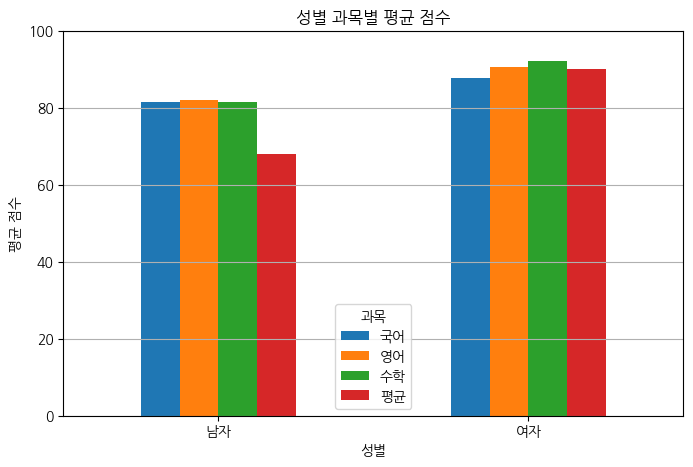

In [406]:
df_gender.plot(x = '성별', kind = 'bar', figsize=(8,5))
plt.title('성별 과목별 평균 점수')
plt.xlabel('성별')
plt.ylabel('평균 점수')
plt.ylim(0, 100)
plt.legend(title='과목')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

In [407]:
import pandas as pd

data3 = {
    '제품': ['A', 'A', 'B', 'B', 'C'],
    '가격': [1000, 1200, 800, 850, 900],
    '판매량': [10, 15, 20, 25, 30],
    '평점': [4.5, 4.0, 4.8, 4.2, 4.6],
    '평가': ['좋음', '좋음', '보통', '나쁨', '좋음']
}
df3 = pd.DataFrame(data3)

df3

,제품,가격,판매량,평점,평가
0,A,1000,10,4.5,좋음
1,A,1200,15,4.0,좋음
2,B,800,20,4.8,보통
3,B,850,25,4.2,나쁨
4,C,900,30,4.6,좋음


In [408]:
df3.groupby('제품').mean(numeric_only=True)

,가격,판매량,평점
제품,,,
A,1100.0,12.5,4.25
B,825.0,22.5,4.50
C,900.0,30.0,4.60


In [409]:
df3.groupby('제품').agg(
    {
        '판매량' : ['sum','mean','count'],
        '가격' : ['min','max'],
        '평점' : ['mean']
    }
)

판매량                가격          평점
   sum  mean count   min   max  mean
제품                                  
A   25  12.5     2  1000  1200  4.25
B   45  22.5     2   800   850  4.50
C   30  30.0     1   900   900  4.60

In [410]:
def range_calc(x):
    return x.max() - x.min()

df3.groupby('제품').agg(
    {
        '판매량' : ['sum','mean','count'],
        '가격' : ['min','max'],
        '평점' : ['mean', range_calc]
    }
)

판매량                가격          평점           
   sum  mean count   min   max  mean range_calc
제품                                             
A   25  12.5     2  1000  1200  4.25        0.5
B   45  22.5     2   800   850  4.50        0.6
C   30  30.0     1   900   900  4.60        0.0

In [411]:
df3.groupby('제품').agg({
    '가격' : [
            ('평균','mean'),
            ('가격범위',lambda x:x.max() - x.min())
        ],
    '판매량' : [('합계','sum')]
})

가격      판매량
        평균 가격범위  합계
제품                 
A   1100.0  200  25
B    825.0   50  45
C    900.0    0  30

In [412]:
import pandas as pd
df4 = pd.DataFrame({
    '제품': ['노트북', '태블릿', '스마트폰', '노트북', '스마트폰', '태블릿'],
    '지역': ['서울', '부산', '서울', '대구', '부산', '서울'],
    '판매량': [10, 5, 8, 12, 6, 4],
    '가격': [1200000, 500000, 800000, 1300000, 750000, 550000],
    '판매자번호': ['A01', 'A02', 'A01', 'A03', 'A02', 'A03']
})
df4

,제품,지역,판매량,가격,판매자번호
0,노트북,서울,10,1200000,A01
1,태블릿,부산,5,500000,A02
2,스마트폰,서울,8,800000,A01
3,노트북,대구,12,1300000,A03
4,스마트폰,부산,6,750000,A02
5,태블릿,서울,4,550000,A03


In [413]:
df4.groupby(['지역','제품'])[['판매량','가격']].mean(numeric_only=True).loc[[('대구','노트북')]]

,,판매량,가격
지역,제품,,
대구,노트북,12.0,1300000.0


In [414]:
result = df4.groupby(['지역','제품'])[['판매량','가격']].mean(numeric_only=True).reset_index()
result.loc[result['제품'] == '노트북']

,지역,제품,판매량,가격
0,대구,노트북,12.0,1300000.0
3,서울,노트북,10.0,1200000.0


In [415]:
df4.groupby(['지역','제품']).agg({
    '판매량' : [('합계','sum')],
    '가격' : [('평균','mean')]
})

판매량         가격
         합계         평균
지역 제품                 
대구 노트북   12  1300000.0
부산 스마트폰   6   750000.0
   태블릿    5   500000.0
서울 노트북   10  1200000.0
   스마트폰   8   800000.0
   태블릿    4   550000.0

In [416]:
import pandas as pd

data = {
    '번호': [100, 101, 102, 103, 104, 105, 106],
    '성명': ['김민재', '이강인', '박찬호', '차범근', '축신수', '손흥민', '황희찬'],
    '나이': [27, 22, 50, 60, 40, 30, 28],
    '몸무게': [75, 75, 82, 80, 90, 69, 68],
    '급여': [54280000, 34280000, 84280000, 50000000, 70000000, 70280000, 25280000],
    '종목': ['축구', '축구', '야구', '야구', '축구', '축구', '축구']
}
df5 = pd.DataFrame(data)
df5

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75,54280000,축구
1,101,이강인,22,75,34280000,축구
2,102,박찬호,50,82,84280000,야구
3,103,차범근,60,80,50000000,야구
4,104,축신수,40,90,70000000,축구
5,105,손흥민,30,69,70280000,축구
6,106,황희찬,28,68,25280000,축구


In [417]:
df5['급여'].max()

np.int64(84280000)

In [418]:
df5[df5['급여'] == df5['급여'].max()]

,번호,성명,나이,몸무게,급여,종목
2,102,박찬호,50,82,84280000,야구


In [419]:
df5.loc[df5['급여'] == df5['급여'].max(), ['성명']]

,성명
2,박찬호


In [420]:
df5['급여'].min()

np.int64(25280000)

In [421]:
df5['급여'].sum()

np.int64(388400000)

In [422]:
df5['급여'].median()

np.float64(54280000.0)

In [423]:
df5['종목'].mode()

0    축구
Name: 종목, dtype: object

In [424]:
df5['종목'].count()

np.int64(7)

In [425]:
df5['종목'].value_counts()

종목
축구    5
야구    2
Name: count, dtype: int64

In [426]:
df5.describe()

,번호,나이,몸무게,급여
count,7.000000,7.000000,7.000000,7.000000e+00
mean,103.000000,36.714286,77.000000,5.548571e+07
std,2.160247,13.912995,7.702813,2.102483e+07
min,100.000000,22.000000,68.000000,2.528000e+07
25%,101.500000,27.500000,72.000000,4.214000e+07
50%,103.000000,30.000000,75.000000,5.428000e+07
75%,104.500000,45.000000,81.000000,7.014000e+07
max,106.000000,60.000000,90.000000,8.428000e+07


In [427]:
df5[['급여']].describe()

,급여
count,7.000000e+00
mean,5.548571e+07
std,2.102483e+07
min,2.528000e+07
25%,4.214000e+07
50%,5.428000e+07
75%,7.014000e+07
max,8.428000e+07


In [428]:
df5[['급여']].quantile(0.25)

급여    42140000.0
Name: 0.25, dtype: float64

In [429]:
# 종목별 나이와 급여의 평균
df5.groupby('종목')[['나이','급여']].mean(numeric_only=True)

,나이,급여
종목,,
야구,55.0,67140000.0
축구,29.4,50824000.0


In [430]:
# 종목별 나이와 급여의 평균
df5.groupby('종목')[['나이','급여']].mean(numeric_only=True).reset_index()

,종목,나이,급여
0,야구,55.0,67140000.0
1,축구,29.4,50824000.0


In [431]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      7 non-null      int64 
 1   성명      7 non-null      object
 2   나이      7 non-null      int64 
 3   몸무게     7 non-null      int64 
 4   급여      7 non-null      int64 
 5   종목      7 non-null      object
dtypes: int64(4), object(2)
memory usage: 464.0+ bytes


In [432]:
df5['몸무게'] = df5['몸무게'].astype(str) # str로 형변환
df5.info()
df5.groupby('종목').mean(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      7 non-null      int64 
 1   성명      7 non-null      object
 2   나이      7 non-null      int64 
 3   몸무게     7 non-null      object
 4   급여      7 non-null      int64 
 5   종목      7 non-null      object
dtypes: int64(3), object(3)
memory usage: 464.0+ bytes


,번호,나이,급여
종목,,,
야구,102.5,55.0,67140000.0
축구,103.2,29.4,50824000.0


In [433]:
df5['몸무게'] = df5['몸무게'].astype(int) # int로 형변환
df5.info()
df5.groupby('종목').mean(numeric_only=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      7 non-null      int64 
 1   성명      7 non-null      object
 2   나이      7 non-null      int64 
 3   몸무게     7 non-null      int64 
 4   급여      7 non-null      int64 
 5   종목      7 non-null      object
dtypes: int64(4), object(2)
memory usage: 464.0+ bytes


,번호,나이,몸무게,급여
종목,,,,
야구,102.5,55.0,81.0,67140000.0
축구,103.2,29.4,75.4,50824000.0


In [434]:
df5.loc[df5['몸무게'] >= 80, '몸무게'] = None
df5

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75.0,54280000,축구
1,101,이강인,22,75.0,34280000,축구
2,102,박찬호,50,NaN,84280000,야구
3,103,차범근,60,NaN,50000000,야구
4,104,축신수,40,NaN,70000000,축구
5,105,손흥민,30,69.0,70280000,축구
6,106,황희찬,28,68.0,25280000,축구


In [435]:
# 비권장ㅠ
df5.fillna({'몸무게' : 80}, inplace=True)
df5

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75.0,54280000,축구
1,101,이강인,22,75.0,34280000,축구
2,102,박찬호,50,80.0,84280000,야구
3,103,차범근,60,80.0,50000000,야구
4,104,축신수,40,80.0,70000000,축구
5,105,손흥민,30,69.0,70280000,축구
6,106,황희찬,28,68.0,25280000,축구


In [436]:
# 권장
df5['몸무게'] = df5['몸무게'].fillna(80)
df5

,번호,성명,나이,몸무게,급여,종목
0,100,김민재,27,75.0,54280000,축구
1,101,이강인,22,75.0,34280000,축구
2,102,박찬호,50,80.0,84280000,야구
3,103,차범근,60,80.0,50000000,야구
4,104,축신수,40,80.0,70000000,축구
5,105,손흥민,30,69.0,70280000,축구
6,106,황희찬,28,68.0,25280000,축구


In [437]:
df_csv = pd.read_csv('pandas_clean.csv', encoding='CP949')
print('[csv]\n',df_csv)

[csv]
     이름     나이   몸무게        생년월일       급여
0  김철수   25.0  75.0    20000101  3500000
1  이영희   30.0  55.0  1994-05-15   100000
2  박민수  500.0  68.0  1993-08-22  4200000
3  정미영   28.0   NaN  1996-02-28  3800000
4  강지아    NaN  52.0  1998-11-30  3600000
5  최현우   35.0  80.0  1989-07-12  5000000
6  송은지   29.0  58.0  1995-03-18  3900000
7  송은지   29.0  58.0  1995-03-18  3900000


In [438]:
df_csv[df_csv['나이'] > 100]

,이름,나이,몸무게,생년월일,급여
2,박민수,500.0,68.0,1993-08-22,4200000


In [439]:
df_csv.loc[df_csv['나이'] > 100, ['나이']] = 50
df_csv

,이름,나이,몸무게,생년월일,급여
0,김철수,25.0,75.0,20000101,3500000
1,이영희,30.0,55.0,1994-05-15,100000
2,박민수,50.0,68.0,1993-08-22,4200000
3,정미영,28.0,NaN,1996-02-28,3800000
4,강지아,NaN,52.0,1998-11-30,3600000
5,최현우,35.0,80.0,1989-07-12,5000000
6,송은지,29.0,58.0,1995-03-18,3900000
7,송은지,29.0,58.0,1995-03-18,3900000


In [440]:
df_csv['나이'] = df_csv['나이'].fillna(int(df_csv['나이'].mean()))
df_csv

,이름,나이,몸무게,생년월일,급여
0,김철수,25.0,75.0,20000101,3500000
1,이영희,30.0,55.0,1994-05-15,100000
2,박민수,50.0,68.0,1993-08-22,4200000
3,정미영,28.0,NaN,1996-02-28,3800000
4,강지아,32.0,52.0,1998-11-30,3600000
5,최현우,35.0,80.0,1989-07-12,5000000
6,송은지,29.0,58.0,1995-03-18,3900000
7,송은지,29.0,58.0,1995-03-18,3900000


In [441]:
df_csv['나이'].info()
df_csv['나이'] = df_csv['나이'].astype(int)
df_csv['나이'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8 entries, 0 to 7
Series name: 나이
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 192.0 bytes
<class 'pandas.core.series.Series'>
RangeIndex: 8 entries, 0 to 7
Series name: 나이
Non-Null Count  Dtype
--------------  -----
8 non-null      int64
dtypes: int64(1)
memory usage: 192.0 bytes


In [442]:
df_csv

,이름,나이,몸무게,생년월일,급여
0,김철수,25,75.0,20000101,3500000
1,이영희,30,55.0,1994-05-15,100000
2,박민수,50,68.0,1993-08-22,4200000
3,정미영,28,NaN,1996-02-28,3800000
4,강지아,32,52.0,1998-11-30,3600000
5,최현우,35,80.0,1989-07-12,5000000
6,송은지,29,58.0,1995-03-18,3900000
7,송은지,29,58.0,1995-03-18,3900000


In [443]:
df_csv['몸무게'] = df_csv['몸무게'].fillna(df_csv['몸무게'].mean().round(1))
df_csv

,이름,나이,몸무게,생년월일,급여
0,김철수,25,75.0,20000101,3500000
1,이영희,30,55.0,1994-05-15,100000
2,박민수,50,68.0,1993-08-22,4200000
3,정미영,28,63.7,1996-02-28,3800000
4,강지아,32,52.0,1998-11-30,3600000
5,최현우,35,80.0,1989-07-12,5000000
6,송은지,29,58.0,1995-03-18,3900000
7,송은지,29,58.0,1995-03-18,3900000


In [444]:
df_csv.loc[1,'급여'] = None
df_csv

,이름,나이,몸무게,생년월일,급여
0,김철수,25,75.0,20000101,3500000.0
1,이영희,30,55.0,1994-05-15,NaN
2,박민수,50,68.0,1993-08-22,4200000.0
3,정미영,28,63.7,1996-02-28,3800000.0
4,강지아,32,52.0,1998-11-30,3600000.0
5,최현우,35,80.0,1989-07-12,5000000.0
6,송은지,29,58.0,1995-03-18,3900000.0
7,송은지,29,58.0,1995-03-18,3900000.0


In [445]:
df_csv['급여'] = df_csv['급여'].fillna(df_csv['급여'].mean().round(1))
df_csv.info()
df_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      8 non-null      object 
 1   나이      8 non-null      int64  
 2   몸무게     8 non-null      float64
 3   생년월일    8 non-null      object 
 4   급여      8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 448.0+ bytes


,이름,나이,몸무게,생년월일,급여
0,김철수,25,75.0,20000101,3500000.0
1,이영희,30,55.0,1994-05-15,3985714.3
2,박민수,50,68.0,1993-08-22,4200000.0
3,정미영,28,63.7,1996-02-28,3800000.0
4,강지아,32,52.0,1998-11-30,3600000.0
5,최현우,35,80.0,1989-07-12,5000000.0
6,송은지,29,58.0,1995-03-18,3900000.0
7,송은지,29,58.0,1995-03-18,3900000.0


In [446]:
df_csv['급여'] = df_csv['급여'].astype(int)
df_csv.info()
df_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      8 non-null      object 
 1   나이      8 non-null      int64  
 2   몸무게     8 non-null      float64
 3   생년월일    8 non-null      object 
 4   급여      8 non-null      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 448.0+ bytes


,이름,나이,몸무게,생년월일,급여
0,김철수,25,75.0,20000101,3500000
1,이영희,30,55.0,1994-05-15,3985714
2,박민수,50,68.0,1993-08-22,4200000
3,정미영,28,63.7,1996-02-28,3800000
4,강지아,32,52.0,1998-11-30,3600000
5,최현우,35,80.0,1989-07-12,5000000
6,송은지,29,58.0,1995-03-18,3900000
7,송은지,29,58.0,1995-03-18,3900000


In [447]:
df_csv['생년월일'] = pd.to_datetime(df_csv['생년월일'].astype(str).str.replace('-',''),format='%Y%m%d')
df_csv.info()
df_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      8 non-null      object        
 1   나이      8 non-null      int64         
 2   몸무게     8 non-null      float64       
 3   생년월일    8 non-null      datetime64[ns]
 4   급여      8 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,이름,나이,몸무게,생년월일,급여
0,김철수,25,75.0,2000-01-01,3500000
1,이영희,30,55.0,1994-05-15,3985714
2,박민수,50,68.0,1993-08-22,4200000
3,정미영,28,63.7,1996-02-28,3800000
4,강지아,32,52.0,1998-11-30,3600000
5,최현우,35,80.0,1989-07-12,5000000
6,송은지,29,58.0,1995-03-18,3900000
7,송은지,29,58.0,1995-03-18,3900000


In [448]:
df_csv['생년월일'].dt.year

0    2000
1    1994
2    1993
3    1996
4    1998
5    1989
6    1995
7    1995
Name: 생년월일, dtype: int32

In [449]:
df_csv['생년월일'].dt.month

0     1
1     5
2     8
3     2
4    11
5     7
6     3
7     3
Name: 생년월일, dtype: int32

In [450]:
df_csv['생년월일'].dt.day

0     1
1    15
2    22
3    28
4    30
5    12
6    18
7    18
Name: 생년월일, dtype: int32

In [451]:
# 실제년도 파생컬럼
df_csv['출생년도'] = df_csv['생년월일'].dt.year
df_csv

,이름,나이,몸무게,생년월일,급여,출생년도
0,김철수,25,75.0,2000-01-01,3500000,2000
1,이영희,30,55.0,1994-05-15,3985714,1994
2,박민수,50,68.0,1993-08-22,4200000,1993
3,정미영,28,63.7,1996-02-28,3800000,1996
4,강지아,32,52.0,1998-11-30,3600000,1998
5,최현우,35,80.0,1989-07-12,5000000,1989
6,송은지,29,58.0,1995-03-18,3900000,1995
7,송은지,29,58.0,1995-03-18,3900000,1995


In [452]:
from datetime import datetime
df_csv['실제나이'] = datetime.now().year - df_csv['출생년도']
df_csv

,이름,나이,몸무게,생년월일,급여,출생년도,실제나이
0,김철수,25,75.0,2000-01-01,3500000,2000,25
1,이영희,30,55.0,1994-05-15,3985714,1994,31
2,박민수,50,68.0,1993-08-22,4200000,1993,32
3,정미영,28,63.7,1996-02-28,3800000,1996,29
4,강지아,32,52.0,1998-11-30,3600000,1998,27
5,최현우,35,80.0,1989-07-12,5000000,1989,36
6,송은지,29,58.0,1995-03-18,3900000,1995,30
7,송은지,29,58.0,1995-03-18,3900000,1995,30


In [453]:
df_csv.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
dtype: bool

In [454]:
df_csv.drop(df_csv[df_csv.duplicated()].index)

,이름,나이,몸무게,생년월일,급여,출생년도,실제나이
0,김철수,25,75.0,2000-01-01,3500000,2000,25
1,이영희,30,55.0,1994-05-15,3985714,1994,31
2,박민수,50,68.0,1993-08-22,4200000,1993,32
3,정미영,28,63.7,1996-02-28,3800000,1996,29
4,강지아,32,52.0,1998-11-30,3600000,1998,27
5,최현우,35,80.0,1989-07-12,5000000,1989,36
6,송은지,29,58.0,1995-03-18,3900000,1995,30


In [455]:
df_csv = df_csv.drop_duplicates()
df_csv.info()
df_csv

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      7 non-null      object        
 1   나이      7 non-null      int64         
 2   몸무게     7 non-null      float64       
 3   생년월일    7 non-null      datetime64[ns]
 4   급여      7 non-null      int64         
 5   출생년도    7 non-null      int32         
 6   실제나이    7 non-null      int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(1)
memory usage: 392.0+ bytes


,이름,나이,몸무게,생년월일,급여,출생년도,실제나이
0,김철수,25,75.0,2000-01-01,3500000,2000,25
1,이영희,30,55.0,1994-05-15,3985714,1994,31
2,박민수,50,68.0,1993-08-22,4200000,1993,32
3,정미영,28,63.7,1996-02-28,3800000,1996,29
4,강지아,32,52.0,1998-11-30,3600000,1998,27
5,최현우,35,80.0,1989-07-12,5000000,1989,36
6,송은지,29,58.0,1995-03-18,3900000,1995,30


In [456]:
df_csv['몸무게'] = df_csv['몸무게'].astype(float).apply(lambda x:'{:.02f}'.format(x))
# df_csv.loc[:,'몸무게'] = df_csv.loc[:,'몸무게'].apply(lambda x:'{:.02f}'.format(x))
# df_csv.loc[:,'몸무게'] = df_csv.loc[:,'몸무게'].astype(float)
df_csv.info()
df_csv

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      7 non-null      object        
 1   나이      7 non-null      int64         
 2   몸무게     7 non-null      object        
 3   생년월일    7 non-null      datetime64[ns]
 4   급여      7 non-null      int64         
 5   출생년도    7 non-null      int32         
 6   실제나이    7 non-null      int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(2)
memory usage: 392.0+ bytes


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6528\4067622879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_csv['몸무게'] = df_csv['몸무게'].astype(float).apply(lambda x:'{:.02f}'.format(x))


,이름,나이,몸무게,생년월일,급여,출생년도,실제나이
0,김철수,25,75.00,2000-01-01,3500000,2000,25
1,이영희,30,55.00,1994-05-15,3985714,1994,31
2,박민수,50,68.00,1993-08-22,4200000,1993,32
3,정미영,28,63.70,1996-02-28,3800000,1996,29
4,강지아,32,52.00,1998-11-30,3600000,1998,27
5,최현우,35,80.00,1989-07-12,5000000,1989,36
6,송은지,29,58.00,1995-03-18,3900000,1995,30


In [457]:
df_csv = df_csv.drop('나이',axis=1)

In [458]:
df_csv['출생년도'] = df_csv['출생년도'].astype('int64')
df_csv['실제나이'] = df_csv['실제나이'].astype('int64')
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      7 non-null      object        
 1   몸무게     7 non-null      object        
 2   생년월일    7 non-null      datetime64[ns]
 3   급여      7 non-null      int64         
 4   출생년도    7 non-null      int64         
 5   실제나이    7 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 392.0+ bytes


In [459]:
df_csv2 = pd.read_csv('pandas_clean2.csv', encoding='CP949')

# astype으로 형 변환(자료형이 섞여 있을 시 에러 발생)
df_csv2['몸무게'] = df_csv2['몸무게'].astype(str)
df_csv2.info()
# to_numeric으로 형 변환(자료형이 석여 있어도 에러X)
df_csv2['몸무게'] = pd.to_numeric(df_csv2['몸무게'], errors = 'coerce')
df_csv2.info()

df_csv2.info()
df_csv2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      8 non-null      object 
 1   나이      7 non-null      float64
 2   몸무게     8 non-null      object 
 3   생년월일    8 non-null      object 
 4   급여      8 non-null      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 448.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      8 non-null      object 
 1   나이      7 non-null      float64
 2   몸무게     7 non-null      float64
 3   생년월일    8 non-null      object 
 4   급여      8 non-null      int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 448.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------

,이름,나이,몸무게,생년월일,급여
0,홍길동,28.0,70.0,19960415,3200000
1,김영수,32.0,63.0,1992-03-21,150000
2,이미라,450.0,75.0,1991-09-15,4500000
3,박준호,27.0,NaN,1997-11-08,3600000
4,최서연,NaN,48.0,1995-07-25,3400000
5,정태민,31.0,82.0,1993-04-30,4800000
6,백지원,26.0,54.0,1998-08-12,3300000
7,백지원,26.0,54.0,1998-08-12,3300000


In [460]:
from datetime import datetime

# 몸무게 이상치는 평균으로 변환
df_csv2.loc[:,'몸무게'] = df_csv2['몸무게'].fillna(round(df_csv2['몸무게'].mean(),1))
# 생년월일 이상치는 형식에 맞춰서 변환
df_csv2['생년월일'] = pd.to_datetime(df_csv2['생년월일'].astype(str).str.replace('-',''),format='%Y%m%d')

# 나이 이상치와 결측치를 생년월일을 계산해 실제 나이로 전환
df_csv2 = df_csv2.rename(columns={"나이": "실제나이"}) # 굳이 이름은 안바꿔도 괜찮음
df_csv2['실제나이'] = (datetime.now().year - df_csv2['생년월일'].dt.year).astype(int) # 나이이므로 int로 형변환

# 중복 제거
df_csv2 = df_csv2.drop_duplicates()

# 급여는 이상치 처리 공식을 활용해 처리
# 이상치 처리 공식 활용(IQR : Interquartitle Range, 사분위 범위)
q1 = df_csv2['급여'].quantile(0.25)
q3 = df_csv2['급여'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 2.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_csv2['급여'] = np.where((df_csv2['급여'] < lower_bound), df_csv2['급여'] * 10, np.where((df_csv2['급여'] > upper_bound), df_csv2['급여'] / 10 , df_csv2['급여'])).astype('int64')
df_csv2.info()
df_csv2

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   이름      7 non-null      object        
 1   실제나이    7 non-null      int64         
 2   몸무게     7 non-null      float64       
 3   생년월일    7 non-null      datetime64[ns]
 4   급여      7 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 336.0+ bytes


,이름,실제나이,몸무게,생년월일,급여
0,홍길동,29,70.0,1996-04-15,3200000
1,김영수,33,63.0,1992-03-21,1500000
2,이미라,34,75.0,1991-09-15,4500000
3,박준호,28,63.7,1997-11-08,3600000
4,최서연,30,48.0,1995-07-25,3400000
5,정태민,32,82.0,1993-04-30,4800000
6,백지원,27,54.0,1998-08-12,3300000


In [461]:
df_csv3 = pd.read_csv('df_sample.csv')
df_csv3['합계'] = df_csv3['중간'] + df_csv3['기말']
df_csv3.info()
df_csv3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학번      10 non-null     object
 1   중간      10 non-null     int64 
 2   기말      10 non-null     int64 
 3   리포트     10 non-null     int64 
 4   퀴즈      10 non-null     int64 
 5   합계      10 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 608.0+ bytes


,학번,중간,기말,리포트,퀴즈,합계
0,S01,90,95,20,20,185
1,S02,82,83,18,18,165
2,S03,80,78,18,18,158
3,S04,78,75,10,10,153
4,S05,93,91,12,12,184
5,S06,71,75,16,16,146
6,S07,60,80,18,18,140
7,S08,72,65,14,14,137
8,S09,65,65,14,14,130
9,S10,85,78,10,10,163


In [462]:
# 1 "1반","1반","1반","2반","2반","2반","3반","3반","3반","3반"
cls = ["1반","1반","1반","2반","2반","2반","3반","3반","3반","3반"]
df_csv3['cls'] = cls
df_csv3.info()
df_csv3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학번      10 non-null     object
 1   중간      10 non-null     int64 
 2   기말      10 non-null     int64 
 3   리포트     10 non-null     int64 
 4   퀴즈      10 non-null     int64 
 5   합계      10 non-null     int64 
 6   cls     10 non-null     object
dtypes: int64(5), object(2)
memory usage: 688.0+ bytes


,학번,중간,기말,리포트,퀴즈,합계,cls
0,S01,90,95,20,20,185,1반
1,S02,82,83,18,18,165,1반
2,S03,80,78,18,18,158,1반
3,S04,78,75,10,10,153,2반
4,S05,93,91,12,12,184,2반
5,S06,71,75,16,16,146,2반
6,S07,60,80,18,18,140,3반
7,S08,72,65,14,14,137,3반
8,S09,65,65,14,14,130,3반
9,S10,85,78,10,10,163,3반


In [463]:
# Z-score 정규화 : (점수 - 평균) / 표준편차, (평균 : 0, 표준편차 : 1)
import numpy as np

# mid_avg = df['중간'].mean()
# mid_std = df['중간'].std()

mid_avg = np.mean(df_csv3['중간']) # 중간점수 평균
mid_std = np.std(df_csv3['중간']) # 중간점수 표준편차

z_score = (df_csv3['중간'] - mid_avg) / mid_std
df_csv3['중간_Z점수'] = z_score

print(z_score)
df_csv3.info()
df_csv3

0    1.231167
1    0.436866
2    0.238290
3    0.039715
4    1.529030
5   -0.655299
6   -1.747463
7   -0.556011
8   -1.251025
9    0.734729
Name: 중간, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      10 non-null     object 
 1   중간      10 non-null     int64  
 2   기말      10 non-null     int64  
 3   리포트     10 non-null     int64  
 4   퀴즈      10 non-null     int64  
 5   합계      10 non-null     int64  
 6   cls     10 non-null     object 
 7   중간_Z점수  10 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 768.0+ bytes


,학번,중간,기말,리포트,퀴즈,합계,cls,중간_Z점수
0,S01,90,95,20,20,185,1반,1.231167
1,S02,82,83,18,18,165,1반,0.436866
2,S03,80,78,18,18,158,1반,0.238290
3,S04,78,75,10,10,153,2반,0.039715
4,S05,93,91,12,12,184,2반,1.529030
5,S06,71,75,16,16,146,2반,-0.655299
6,S07,60,80,18,18,140,3반,-1.747463
7,S08,72,65,14,14,137,3반,-0.556011
8,S09,65,65,14,14,130,3반,-1.251025
9,S10,85,78,10,10,163,3반,0.734729


In [464]:
# min-max 정규화 : (점수 - 최소값) / (최대값 - 최소값)
fin_min = np.min(df_csv3['기말'])
fin_max = np.max(df_csv3['기말'])
min_max = (df_csv3['기말'] - fin_min) / (fin_max - fin_min)
df_csv3['기말_min_max'] = min_max
df_csv3

,학번,중간,기말,리포트,퀴즈,합계,cls,중간_Z점수,기말_min_max
0,S01,90,95,20,20,185,1반,1.231167,1.000000
1,S02,82,83,18,18,165,1반,0.436866,0.600000
2,S03,80,78,18,18,158,1반,0.238290,0.433333
3,S04,78,75,10,10,153,2반,0.039715,0.333333
4,S05,93,91,12,12,184,2반,1.529030,0.866667
5,S06,71,75,16,16,146,2반,-0.655299,0.333333
6,S07,60,80,18,18,140,3반,-1.747463,0.500000
7,S08,72,65,14,14,137,3반,-0.556011,0.000000
8,S09,65,65,14,14,130,3반,-1.251025,0.000000
9,S10,85,78,10,10,163,3반,0.734729,0.433333


In [465]:
df_csv3.groupby('cls')[['중간','기말','리포트','퀴즈','합계']].mean().round(1).reset_index()

,cls,중간,기말,리포트,퀴즈,합계
0,1반,84.0,85.3,18.7,18.7,169.3
1,2반,80.7,80.3,12.7,12.7,161.0
2,3반,70.5,72.0,14.0,14.0,142.5


In [466]:
df_csv3['토론'] = [14,15,13,14,None,None,19,11,12,18]
df_csv3.isna().sum()

학번            0
중간            0
기말            0
리포트           0
퀴즈            0
합계            0
cls           0
중간_Z점수        0
기말_min_max    0
토론            2
dtype: int64

In [467]:
df_csv3[df_csv3['토론'].isna()]

,학번,중간,기말,리포트,퀴즈,합계,cls,중간_Z점수,기말_min_max,토론
4,S05,93,91,12,12,184,2반,1.529030,0.866667,NaN
5,S06,71,75,16,16,146,2반,-0.655299,0.333333,NaN


In [468]:
df_csv3.dropna()

,학번,중간,기말,리포트,퀴즈,합계,cls,중간_Z점수,기말_min_max,토론
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0


In [469]:
df_csv3.dropna(subset=['학번']) # subset : 해당 컬럼만 체크함
df_csv3.dropna(subset=['학번','중간','기말','퀴즈','합계']) # 여러 컬럼도 가능

,학번,중간,기말,리포트,퀴즈,합계,cls,중간_Z점수,기말_min_max,토론
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0
4,S05,93,91,12,12,184,2반,1.529030,0.866667,NaN
5,S06,71,75,16,16,146,2반,-0.655299,0.333333,NaN
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0


In [470]:
df_csv3.dropna(subset=['토론'])

,학번,중간,기말,리포트,퀴즈,합계,cls,중간_Z점수,기말_min_max,토론
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0


In [472]:
import numpy as np

d_mean = np.mean(df_csv3['토론'])
df_csv3['토론'] = df_csv3['토론'].fillna(d_mean)
df_csv3

,학번,중간,기말,리포트,퀴즈,합계,cls,중간_Z점수,기말_min_max,토론
0,S01,90,95,20,20,185,1반,1.231167,1.000000,14.0
1,S02,82,83,18,18,165,1반,0.436866,0.600000,15.0
2,S03,80,78,18,18,158,1반,0.238290,0.433333,13.0
3,S04,78,75,10,10,153,2반,0.039715,0.333333,14.0
4,S05,93,91,12,12,184,2반,1.529030,0.866667,14.5
5,S06,71,75,16,16,146,2반,-0.655299,0.333333,14.5
6,S07,60,80,18,18,140,3반,-1.747463,0.500000,19.0
7,S08,72,65,14,14,137,3반,-0.556011,0.000000,11.0
8,S09,65,65,14,14,130,3반,-1.251025,0.000000,12.0
9,S10,85,78,10,10,163,3반,0.734729,0.433333,18.0
